2025-04-01 10:46:33,762 - INFO - Query region bounds: (9.416186034424953, 54.952615782731385, 9.42699155445743, 54.96100438506525) (runpy.py:93)


2025-04-01 10:46:33,840 - INFO - Area of the polygon: 0.2926628907425799 km² (runpy.py:96)
2025-04-01 10:46:33,867 - INFO - Number of bins x: 227 y: 316 (runpy.py:100)


Size of x edges: 228
Size of y edges: 317


/home/kang/.local/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/kang/.local/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/kang/.local/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/kang/.local/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/kang/.local/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a B

Time taken to generate heatmap for roads: 0.38804173469543457 seconds
Time taken to generate heatmap for wetlands: 0.5969231128692627 seconds


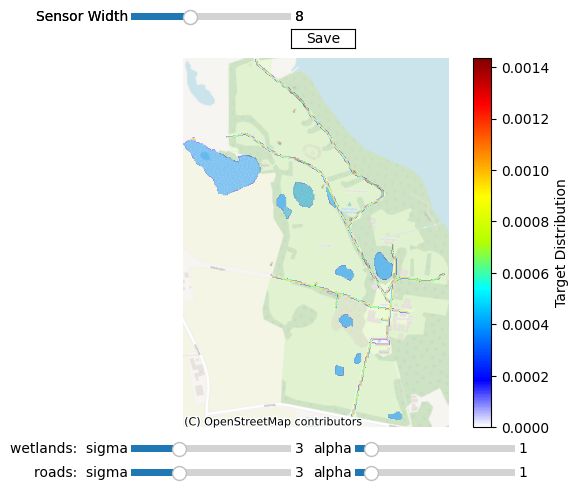

In [ ]:
from trajgenpy import EnvironmentBuilder, Environment


# generate_urban_dataset()
# generate_flatnature_dataset()
# generate_hillyterrainnature_dataset()
# generate_water_dataset()
# exit(0)
# polygon_file = "data/DemaScenarios/HillyTerrainNature.geojson"
# polygon_file = "data/DemaScenarios/Urban.geojson"
# polygon_file = "data/DemaScenarios/Water.geojson"
polygon_file = "DemaScenarios/FlatTerrainNature.geojson"
sigma_features = {"roads": 0, "wetlands": 0}
alpha_features = {"roads": 1, "wetlands": 1}

env = (
    EnvironmentBuilder()
    .set_polygon_file(polygon_file)
    .set_feature(
        "roads",
        {
            "highway": [
                "service",
                "track",
                "highway",
                "primary",
                "secondary",
                "tertiary",
                "residential",
            ]
        },
    )
    .set_feature("wetlands", {"natural": ["water", "wetland"]})
    # .set_feature("structures", {"building": ["yes"]})
    .build()
)
heatmap = env.get_combined_heatmap(sigma_features, alpha_features)
# env.informative_coverage(heatmap)
# env.plot(show_basemap=True, show_features=False, show_heatmap=False,show_coverage=True)

env.interactive_plot(
    heatmap,
    use_sliders=True,
    show_basemap=True,
    show_features=False,
    show_heatmap=True,
    export=False,
    show_coverage=False
)

# heatmap = env.get_combined_heatmap(sigma_features, alpha_features)
# plt.contourf(env.xedges[:-1], env.yedges[:-1], heatmap.T, levels=10, cmap="jet")
# plt.contourf(env.xedges[:-1], env.yedges[:-1], heatmap.T, cmap="jet")
# plt.colorbar(label='Heatmap Intensity')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Heatmap Topology')
# plt.show()

# env.interactive_plot(heatmap,use_sliders=True, show_basemap=True, show_features=False, export=True)